In [ ]:
import kagglehub
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/video-games-sale")

print("Path to dataset files:", path)

In [ ]:
from pyspark.sql import SparkSession

spark = (SparkSession.builder.appName("Video Games Sale").getOrCreate())

In [5]:
data_path = ''
sales = pd.read_csv(data_path+ '/video games sales.csv')
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# The highest sales in each year / platform / Genre
sales_highest_year = sales.groupby('Year')['Global_Sales'].max()
sales_highest_platform = sales.groupby('Platform')['Global_Sales'].max().sort_values(ascending=False)
sales_highest_genre = sales.groupby('Genre')['Global_Sales'].max().sort_values(ascending=False)
# sales_highest_genre

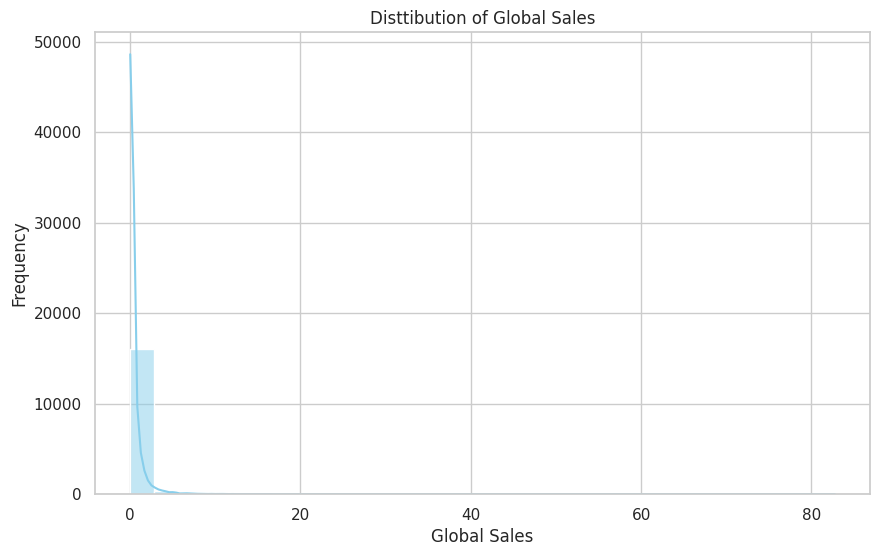

In [10]:
# set Seaborn style
sns.set_theme(style="whitegrid")

# Distribution of Global Sales
plt.figure(figsize=(10,6))
sns.histplot(sales['Global_Sales'], bins=30, kde=True, color='skyblue')
plt.title('Disttibution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

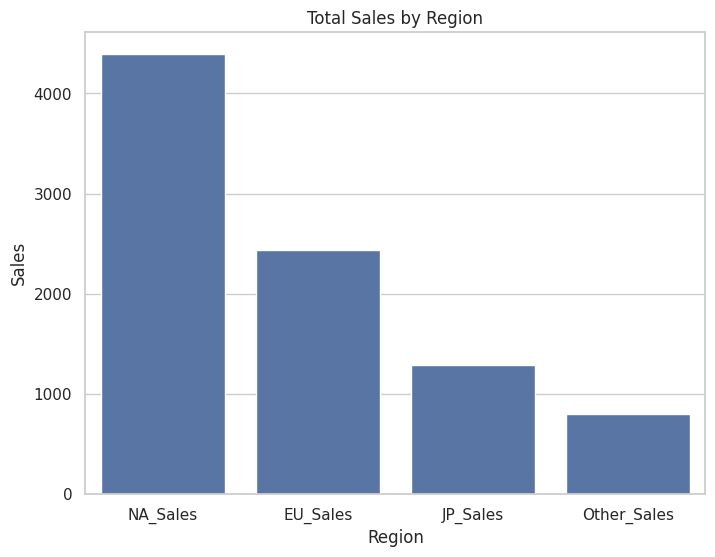

In [12]:
# Sales by Region

region_sales = sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, legend=False)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

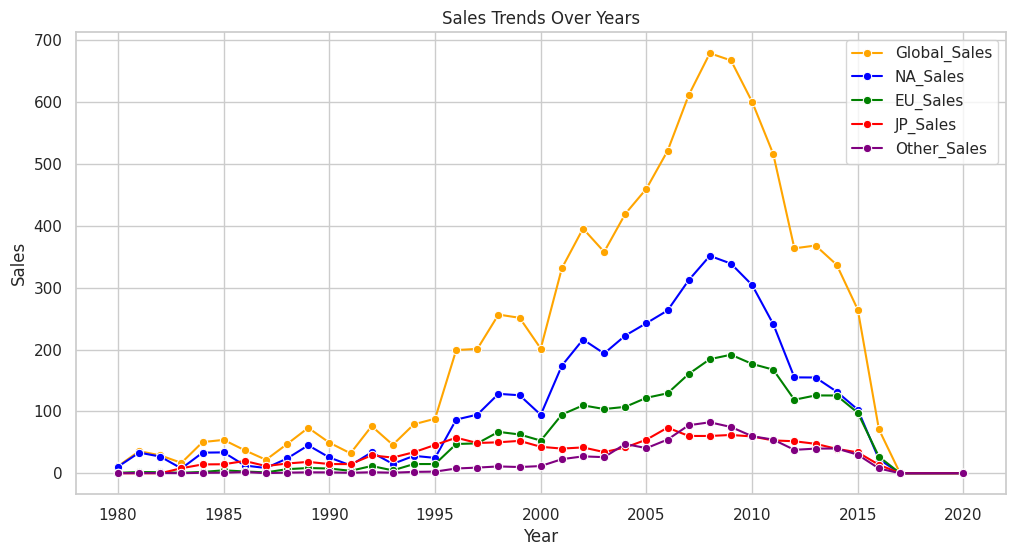

In [24]:
# Sales Trends Over Years
plt.figure(figsize=(12, 6))
yearly_sales = sales.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales['Global_Sales'], marker='o', label='Global_Sales', color='orange')
sns.lineplot(x=yearly_sales.index, y=yearly_sales['NA_Sales'], marker='o', label='NA_Sales', color='blue')
sns.lineplot(x=yearly_sales.index, y=yearly_sales['EU_Sales'], marker='o', label='EU_Sales', color='green')
sns.lineplot(x=yearly_sales.index, y=yearly_sales['JP_Sales'], marker='o', label='JP_Sales', color='red')
sns.lineplot(x=yearly_sales.index, y=yearly_sales['Other_Sales'], marker='o', label='Other_Sales', color='purple')
plt.title('Sales Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

<Figure size 1200x800 with 0 Axes>

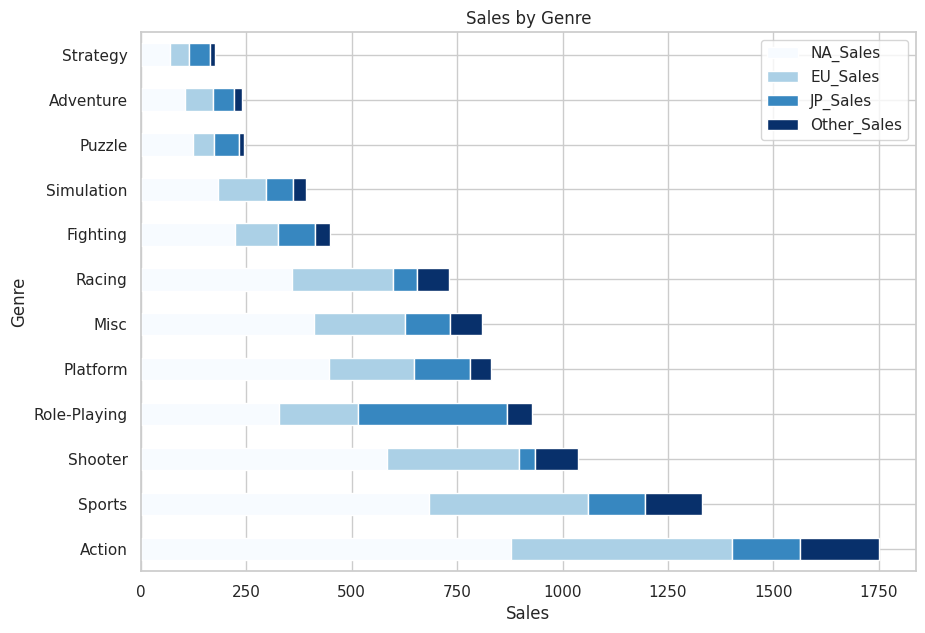

In [26]:
# Sales by Genre
genre_sales = sales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Calculate Global Sales as the sum of regional sales
genre_sales['Global_Sales'] = genre_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# Now, sort the genre_sales DataFrame based on Global_Sales
genre_sales_sorted = genre_sales.sort_values('Global_Sales', ascending=False)

# Plot the stackede bar chart
plt.figure(figsize=(12, 8))
genre_sales_sorted[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind='barh', stacked=True, figsize=(10, 7), colormap='Blues')
plt.title('Sales by Genre')
plt.xlabel('Sales')
plt.ylabel('Genre')
plt.show()

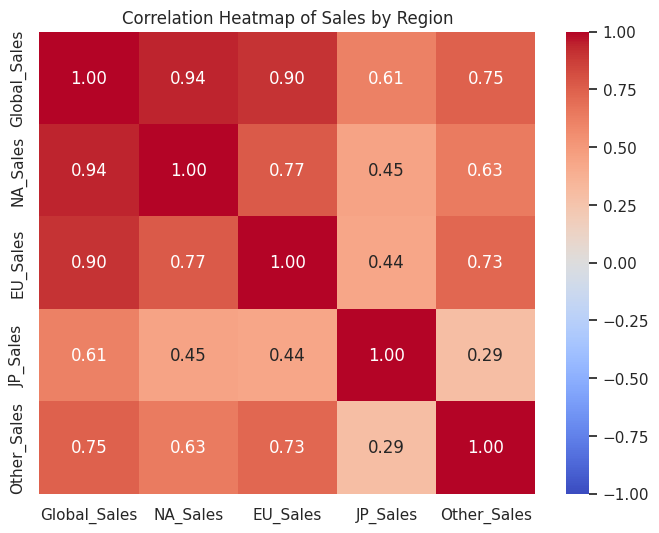

In [28]:
# Correlation Heatmap
sales_columns = ['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
corr_matrix = sales[sales_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Sales by Region')
plt.show()

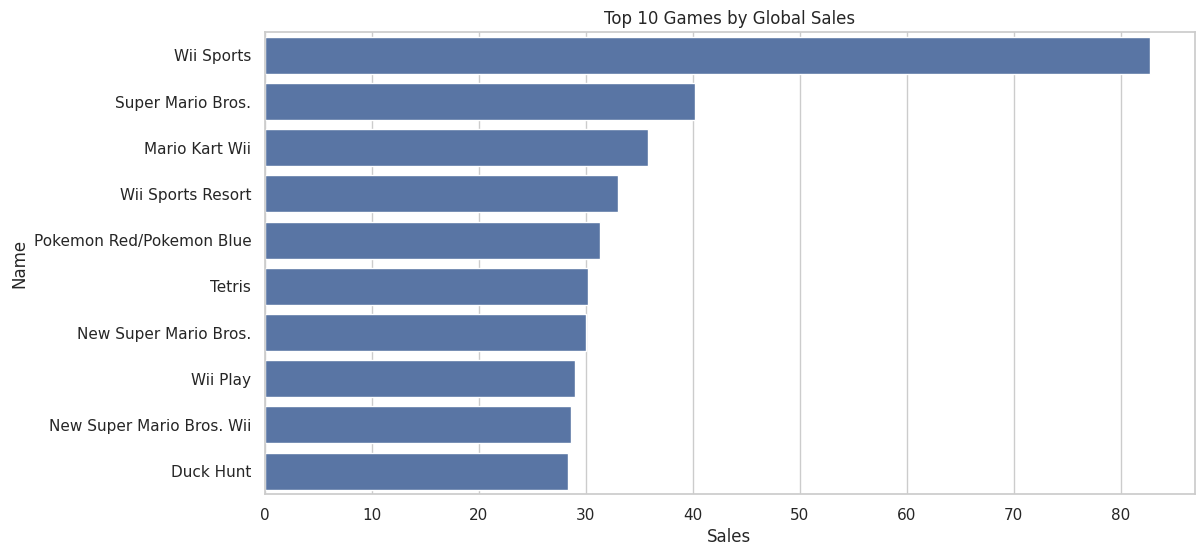

In [32]:
# Top 10 Games by Global Sales
top_games = sales[['Name', 'Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_games, legend=False)
plt.title('Top 10 Games by Global Sales')
plt.xlabel('Sales')
plt.ylabel('Name')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Training Linear Regression...
Performance of Linear Regression:
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
Root Mean Squared Error: 0.01
R-squared: 1.00


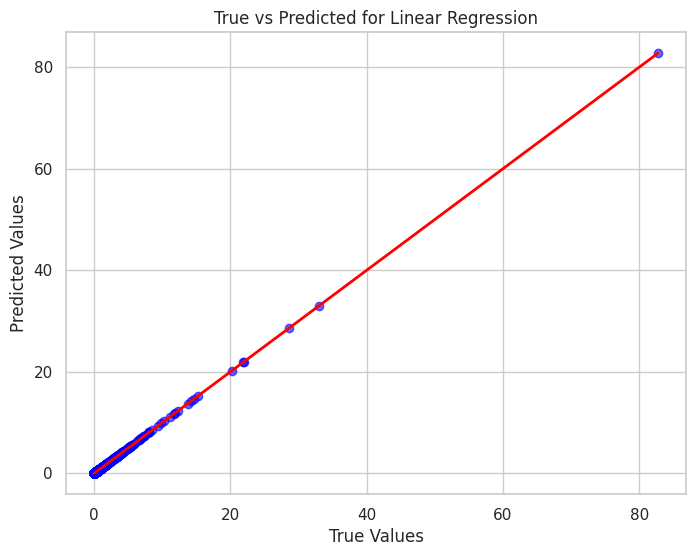

Training Decision Tree Regressor...
Performance of Decision Tree Regressor:
Mean Absolute Error: 0.02
Mean Squared Error: 0.68
Root Mean Squared Error: 0.83
R-squared: 0.84


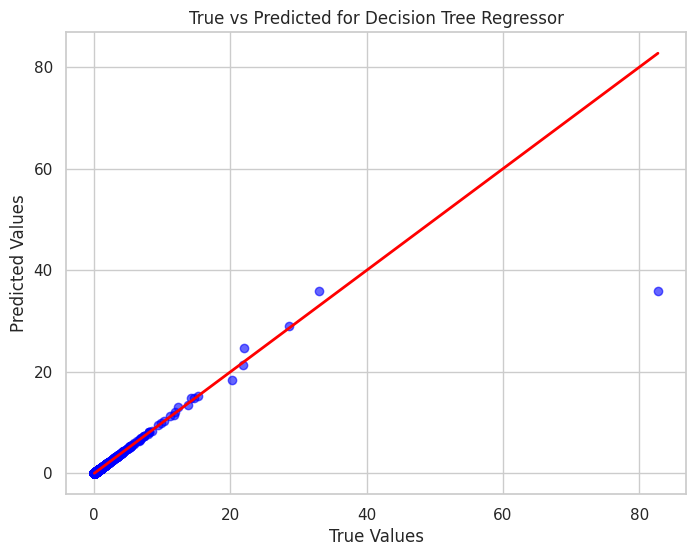

Training Random Forest Regressor...
Performance of Random Forest Regressor:
Mean Absolute Error: 0.02
Mean Squared Error: 0.68
Root Mean Squared Error: 0.82
R-squared: 0.84


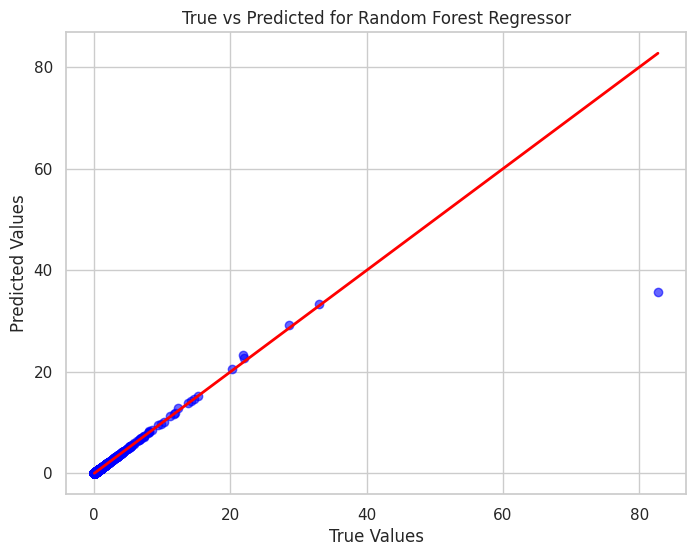

Training Support Vector Regressor...
Performance of Support Vector Regressor:
Mean Absolute Error: 0.21
Mean Squared Error: 3.18
Root Mean Squared Error: 1.78
R-squared: 0.26


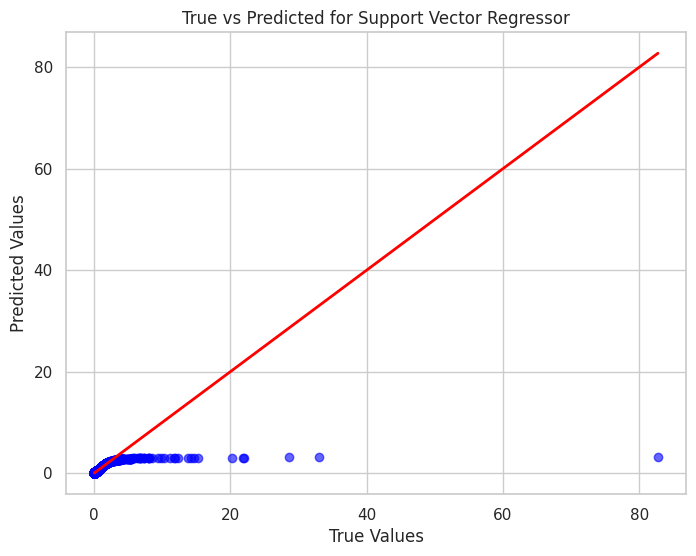

In [36]:
sales = sales.dropna()

label_encoder = LabelEncoder()
sales['Platform'] = label_encoder.fit_transform(sales['Platform'])
sales['Genre'] = label_encoder.fit_transform(sales['Genre'])
sales['Publisher'] = label_encoder.fit_transform(sales['Publisher'])

X = sales.drop(['Global_Sales', 'Name'], axis=1)
y = sales['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models= {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor" : SVR()
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Performance of {model_name}:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.title(f'True vs Predicted for {model_name}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()


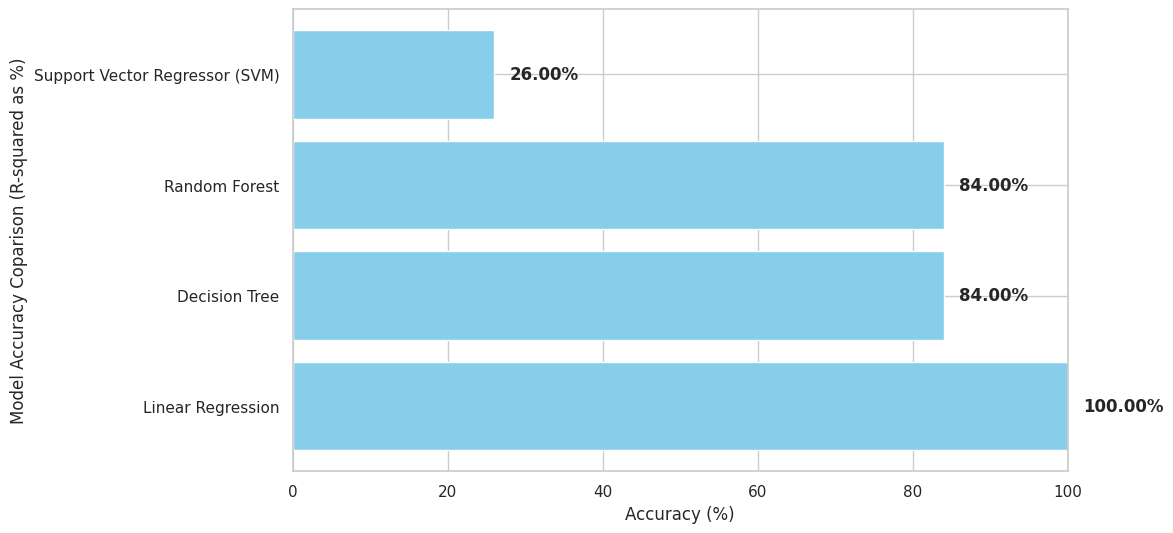

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor (SVM)']
r2_scores = [1.00, 0.84, 0.84, 0.26]

accuracy_percentages = [r2 * 100 for r2 in r2_scores]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_percentages, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model Accuracy Coparison (R-squared as %)')
# plt.xlim(0, 100)
for index, value in enumerate(accuracy_percentages):
    plt.text(value + 2, index, f'{value:.2f}%', va='center', fontweight='bold')
plt.show()